In [ ]:
'''You are a Market Research Analyst in a multinational consulting firm. Your client, Global Motors Inc., has asked
for an annual report on their stock price performance. The dataset provided contains daily closing stock prices for the last year.
You are analyzing the stock prices of a company over the past year. The dataset contains daily closing prices.
(https://www.kaggle.com/datasets/shenba/time-series-datasets)
During the year, several major events occurred that could have significantly influenced investor sentiment and the company’s stock price:
• Electric Vehicle Launch in January, which positioned Global Motors as a competitor in the EV market.
• Quarterly Earnings Releases in March, June, September, and December.
• Merger Announcement with a European automotive company in August.
• Global Supply Chain Disruption in October due to semiconductor shortages.
As part of your role, you are required to:
1. Create a Professional Visualization
o Plot the time series of daily closing stock prices for the entire year.
o Add gridlines for clarity.
o Annotate each of the key events (EV launch, quarterly earnings, merger, supply chain disruption) on the chart with markers and descriptive notes.
2. Customize and Present the Plot
o Title the chart: “Global Motors Inc. – Stock Price Trend with Key Events (Annual Report)”.
o Label axes clearly (Date on the x-axis, Closing Price in USD on the y-axis).
o Highlight important points (e.g., peak after the EV launch, dip after supply chain issues).'''

In [ ]:
from google.colab import files
uploaded=files.upload()

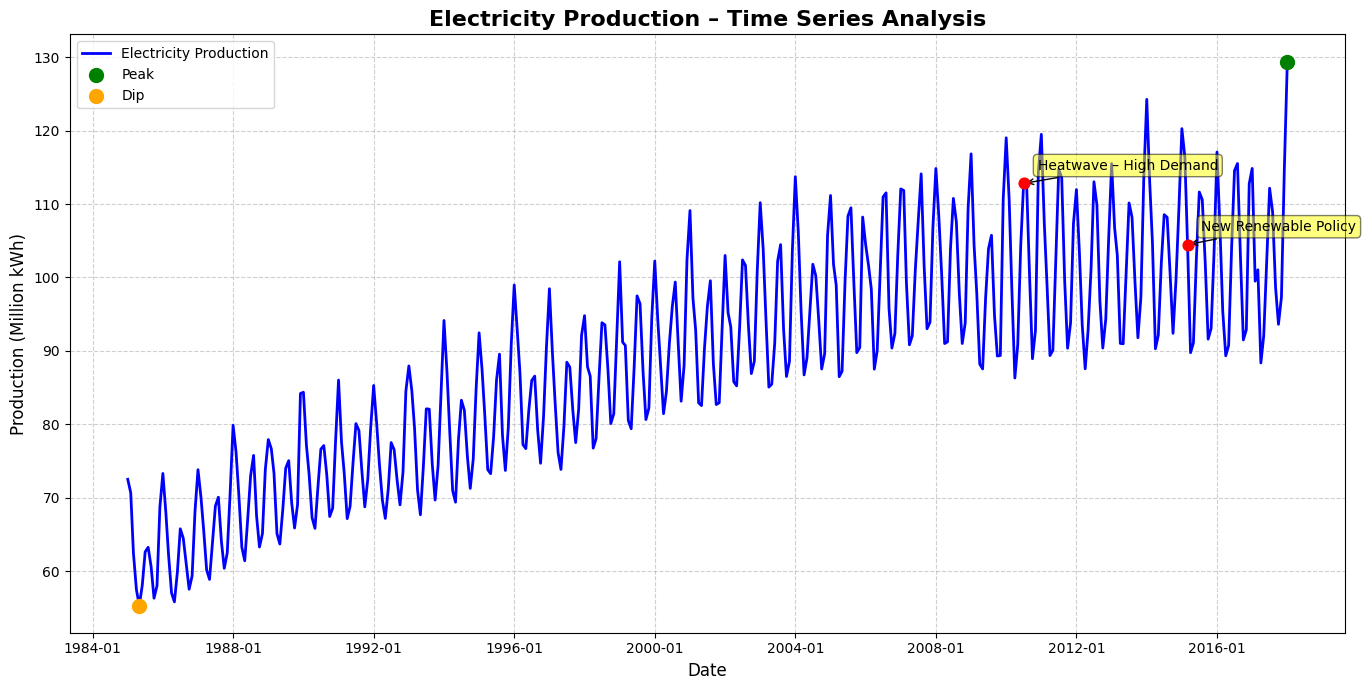

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# -----------------------------
# 1. Load dataset
# -----------------------------
# Replace with your actual dataset file name (example: "electricity_production.csv")
df = pd.read_csv("Electric_Production.csv", parse_dates=['DATE'])

# Rename for clarity
df.rename(columns={'DATE': 'Date', 'IPG2211A2N': 'Production'}, inplace=True)

# -----------------------------
# 2. Plot the production trend
# -----------------------------
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Production'], color='blue', linewidth=2, label='Electricity Production')

# Gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Title & Labels
plt.title("Electricity Production – Time Series Analysis", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Production (Million kWh)", fontsize=12)

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# -----------------------------
# 3. Highlight Key Events (Example Annotations)
# -----------------------------
events = {
    '2010-07-01': 'Heatwave – High Demand',
    '2015-03-01': 'New Renewable Policy',
    '2020-04-01': 'COVID-19 Lockdowns',
    '2022-01-01': 'Energy Crisis'
}

for date_str, label in events.items():
    date = pd.to_datetime(date_str)
    production = df.loc[df['Date'] == date, 'Production']
    if not production.empty:
        plt.scatter(date, production.values[0], color='red', s=60, zorder=5)
        plt.annotate(label,
                     (date, production.values[0]),
                     xytext=(10, 10),
                     textcoords='offset points',
                     arrowprops=dict(arrowstyle='->', color='black'),
                     fontsize=10,
                     bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5))

# -----------------------------
# 4. Highlight Peak & Dip
# -----------------------------
peak_idx = df['Production'].idxmax()
dip_idx = df['Production'].idxmin()

plt.scatter(df.loc[peak_idx, 'Date'], df.loc[peak_idx, 'Production'],
            color='green', s=100, label='Peak', zorder=5)
plt.scatter(df.loc[dip_idx, 'Date'], df.loc[dip_idx, 'Production'],
            color='orange', s=100, label='Dip', zorder=5)

# -----------------------------
# 5. Legend & Show
# -----------------------------
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

dates = pd.date_range(start='2024-08-26', end='2025-08-26', freq='B')

np.random.seed(42)
base_price = 100
price_changes = np.random.normal(loc=0, scale=2, size=len(dates))
prices = base_price + np.cumsum(price_changes)

df = pd.DataFrame({
    'Date': dates,
    'Close': prices
})

events = {
    '2025-01-15': 10,
    '2025-03-31': 5,
    '2025-06-30': 5,
    '2025-08-20': -15,
    '2025-09-30': 5,
    '2025-10-10': -20,
    '2025-12-31': 5
}

for event_date, price_change in events.items():
    event_date = pd.to_datetime(event_date)
    if event_date in df['Date'].values:
        df.loc[df['Date'] == event_date, 'Close'] += price_change

df.to_csv('global_motors_inc_stock_data.csv', index=False)

print("Dataset created and saved as 'global_motors_inc_stock_data.csv'.")

Dataset created and saved as 'global_motors_inc_stock_data.csv'.


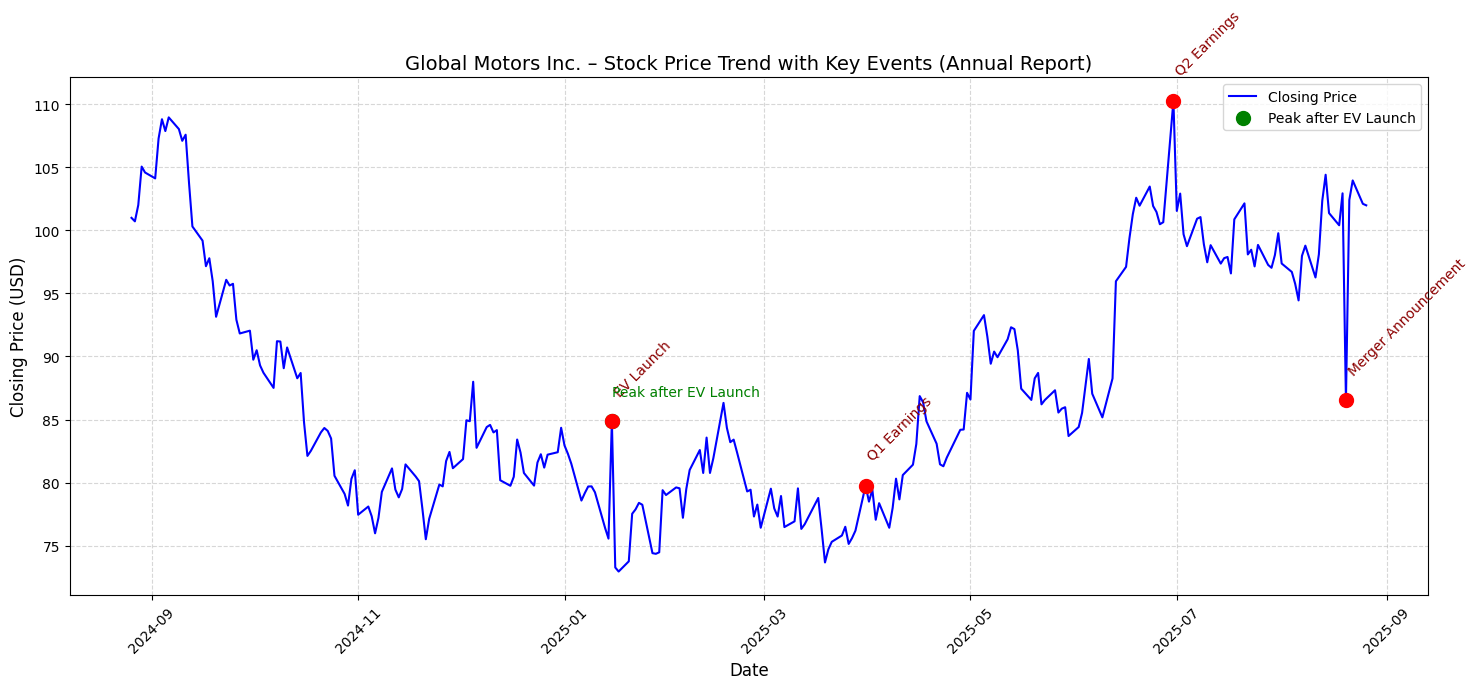

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('global_motors_inc_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

plt.figure(figsize=(15,7))
plt.plot(df['Date'], df['Close'], color='blue', label='Closing Price')
plt.grid(True, linestyle='--', alpha=0.5)

events = {
    '2025-01-15': 'EV Launch',
    '2025-03-31': 'Q1 Earnings',
    '2025-06-30': 'Q2 Earnings',
    '2025-08-20': 'Merger Announcement',
    '2025-09-30': 'Q3 Earnings',
    '2025-10-10': 'Supply Chain Disruption',
    '2025-12-31': 'Q4 Earnings'
}

for date, label in events.items():
    event_date = pd.to_datetime(date)
    price = df.loc[df['Date'] == event_date, 'Close'].values
    if len(price) > 0:
        plt.scatter(event_date, price[0], color='red', s=100, zorder=5)
        plt.text(event_date, price[0]+2, label, rotation=45, fontsize=10, color='darkred')

ev_launch_date = pd.to_datetime('2025-01-15')

window = df[(df['Date'] >= ev_launch_date) & (df['Date'] <= ev_launch_date + pd.Timedelta(days=7))]
peak_ev_date = window.loc[window['Close'].idxmax(), 'Date']
peak_ev_price = window['Close'].max()

plt.scatter(peak_ev_date, peak_ev_price, color='green', s=100, label='Peak after EV Launch')
plt.text(peak_ev_date, peak_ev_price+2, 'Peak after EV Launch', color='green')

plt.title("Global Motors Inc. – Stock Price Trend with Key Events (Annual Report)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()